In [1]:
import pandas as pd 
import numpy as np


from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression,Ridge, Lasso

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import normaltest

import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


import pickle
import json

# Problem statement

# Data Gathering

In [2]:
df=pd.read_csv("Sales_data.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Item_Identifier

In [4]:
df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [5]:
df['Item_Identifier'].isnull().sum()

0

In [6]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [7]:
df['Item_Identifier'].head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

In [8]:
encoder = LabelEncoder()
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Identifier']

0        156
1          8
2        662
3       1121
4       1297
        ... 
8518     370
8519     897
8520    1357
8521     681
8522      50
Name: Item_Identifier, Length: 8523, dtype: int32

# Item_Weight 

In [9]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [10]:
df['Item_Weight'].isnull().sum()

1463

In [11]:
df['Item_Weight'].head(10)

0     9.300
1     5.920
2    17.500
3    19.200
4     8.930
5    10.395
6    13.650
7       NaN
8    16.200
9    19.200
Name: Item_Weight, dtype: float64

In [12]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [13]:
x=df['Item_Weight'].mean()
x

12.857645184136183

In [14]:
df['Item_Weight']=df['Item_Weight'].fillna(x)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 765.9+ KB


# Item_Fat_Content

In [16]:
df['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [17]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'},inplace=True)

In [19]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
encoder = LabelEncoder()
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

In [21]:
df['Item_Fat_Content'].isnull().sum()

0

In [22]:
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

# Item_Type

In [23]:
df['Item_Type']

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
                ...          
8518              Snack Foods
8519             Baking Goods
8520       Health and Hygiene
8521              Snack Foods
8522              Soft Drinks
Name: Item_Type, Length: 8523, dtype: object

In [24]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [25]:
df['Item_Type'].value_counts().to_dict()

{'Fruits and Vegetables': 1232,
 'Snack Foods': 1200,
 'Household': 910,
 'Frozen Foods': 856,
 'Dairy': 682,
 'Canned': 649,
 'Baking Goods': 648,
 'Health and Hygiene': 520,
 'Soft Drinks': 445,
 'Meat': 425,
 'Breads': 251,
 'Hard Drinks': 214,
 'Others': 169,
 'Starchy Foods': 148,
 'Breakfast': 110,
 'Seafood': 64}

In [26]:
# df=pd.get_dummies(df,columns=['Item_Type'],drop_first=True)

In [27]:
encoder = LabelEncoder()
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

In [28]:
df['Item_Type'].value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

# Outlet_Identifier

In [29]:
df['Outlet_Identifier']

0       OUT049
1       OUT018
2       OUT049
3       OUT010
4       OUT013
         ...  
8518    OUT013
8519    OUT045
8520    OUT035
8521    OUT018
8522    OUT046
Name: Outlet_Identifier, Length: 8523, dtype: object

In [30]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [31]:
# df=pd.get_dummies(df,columns=['Outlet_Identifier'],drop_first=True)

In [32]:
encoder = LabelEncoder()
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

In [33]:
df['Outlet_Identifier'].value_counts()

5    935
1    932
9    930
8    930
6    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet_Identifier, dtype: int64

In [34]:
# df.info()

# Outlet_Size 

In [35]:
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [36]:
df['Outlet_Size'].isnull().sum()

2410

In [37]:
df['Outlet_Size'].isnull()

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [38]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [39]:
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [40]:

oe=OrdinalEncoder()
df['Outlet_Size'] = oe.fit_transform(df[['Outlet_Size']])
# df['Outlet_Size'].replace({'High':3, 'Medium':2, 'Small':1},inplace=True)

In [41]:
df['Outlet_Size'].describe()

count    8523.000000
mean        1.170832
std         0.600327
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Outlet_Size, dtype: float64

In [42]:
df['Outlet_Size']=df['Outlet_Size'].fillna(2)

In [43]:
df['Outlet_Size'].isnull().sum()

0

In [44]:
df['Outlet_Size'].value_counts()

1.0    5203
2.0    2388
0.0     932
Name: Outlet_Size, dtype: int64

In [45]:
# df.info()

# Outlet_Location_Type 

In [46]:
df['Outlet_Location_Type']

0       Tier 1
1       Tier 3
2       Tier 1
3       Tier 3
4       Tier 3
         ...  
8518    Tier 3
8519    Tier 2
8520    Tier 2
8521    Tier 3
8522    Tier 1
Name: Outlet_Location_Type, Length: 8523, dtype: object

In [47]:
df['Outlet_Location_Type'].isnull().sum()

0

In [48]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [49]:
# df['Outlet_Location_Type'].replace({'Tier 3':3, 'Tier 2':2, 'Tier 1':1},inplace=True)
oe=OrdinalEncoder()
df['Outlet_Location_Type'] = oe.fit_transform(df[['Outlet_Location_Type']])

In [50]:
df['Outlet_Location_Type'].value_counts()

2.0    3350
1.0    2785
0.0    2388
Name: Outlet_Location_Type, dtype: int64

In [51]:
# df.info()

# Outlet_Type

In [52]:
df['Outlet_Type']

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object

In [53]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [54]:
# df=pd.get_dummies(df,columns=['Outlet_Type'],drop_first=True)

In [55]:
encoder = LabelEncoder()
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [56]:
df['Outlet_Type'].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

In [57]:
# df.info()

In [58]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,0,0.016047,4,249.8092,9,1999,1.0,0.0,1,3735.1380
1,8,5.920000,1,0.019278,14,48.2692,3,2009,1.0,2.0,2,443.4228
2,662,17.500000,0,0.016760,10,141.6180,9,1999,1.0,0.0,1,2097.2700
3,1121,19.200000,1,0.000000,6,182.0950,0,1998,1.0,2.0,0,732.3800
4,1297,8.930000,0,0.000000,9,53.8614,1,1987,0.0,2.0,1,994.7052
5,758,10.395000,1,0.000000,0,51.4008,3,2009,1.0,2.0,2,556.6088
6,696,13.650000,1,0.012741,13,57.6588,1,1987,0.0,2.0,1,343.5528
7,738,12.857645,0,0.127470,13,107.7622,5,1985,1.0,2.0,3,4022.7636
8,440,16.200000,1,0.016687,5,96.9726,7,2002,1.0,1.0,1,1076.5986
9,990,19.200000,1,0.094450,5,187.8214,2,2007,1.0,1.0,1,4710.5350


# Outlet_Establishment_Year

In [59]:
df['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [60]:
df['Outlet_Establishment_Year'].isnull().sum()

0

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   float64
 9   Outlet_Location_Type       8523 non-null   float64
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(6), int32(5), int64(1)
memory usage: 632.7 KB


In [62]:
df.drop(['Item_Identifier'], axis=1,inplace=True)

# Feture Selection

In [63]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,0.002199,-0.173468,0.003053,-0.001975,0.099873,-0.122304,-0.201483,0.467219,1.000000,0.401522


In [64]:
plt.figure(figsize=(130,100))
sns.set(font_scale=7)
sns.heatmap(df.corr(),annot=True,annot_kws={"size":50},cmap="Blues")

<AxesSubplot:>

# VIF

<AxesSubplot:>

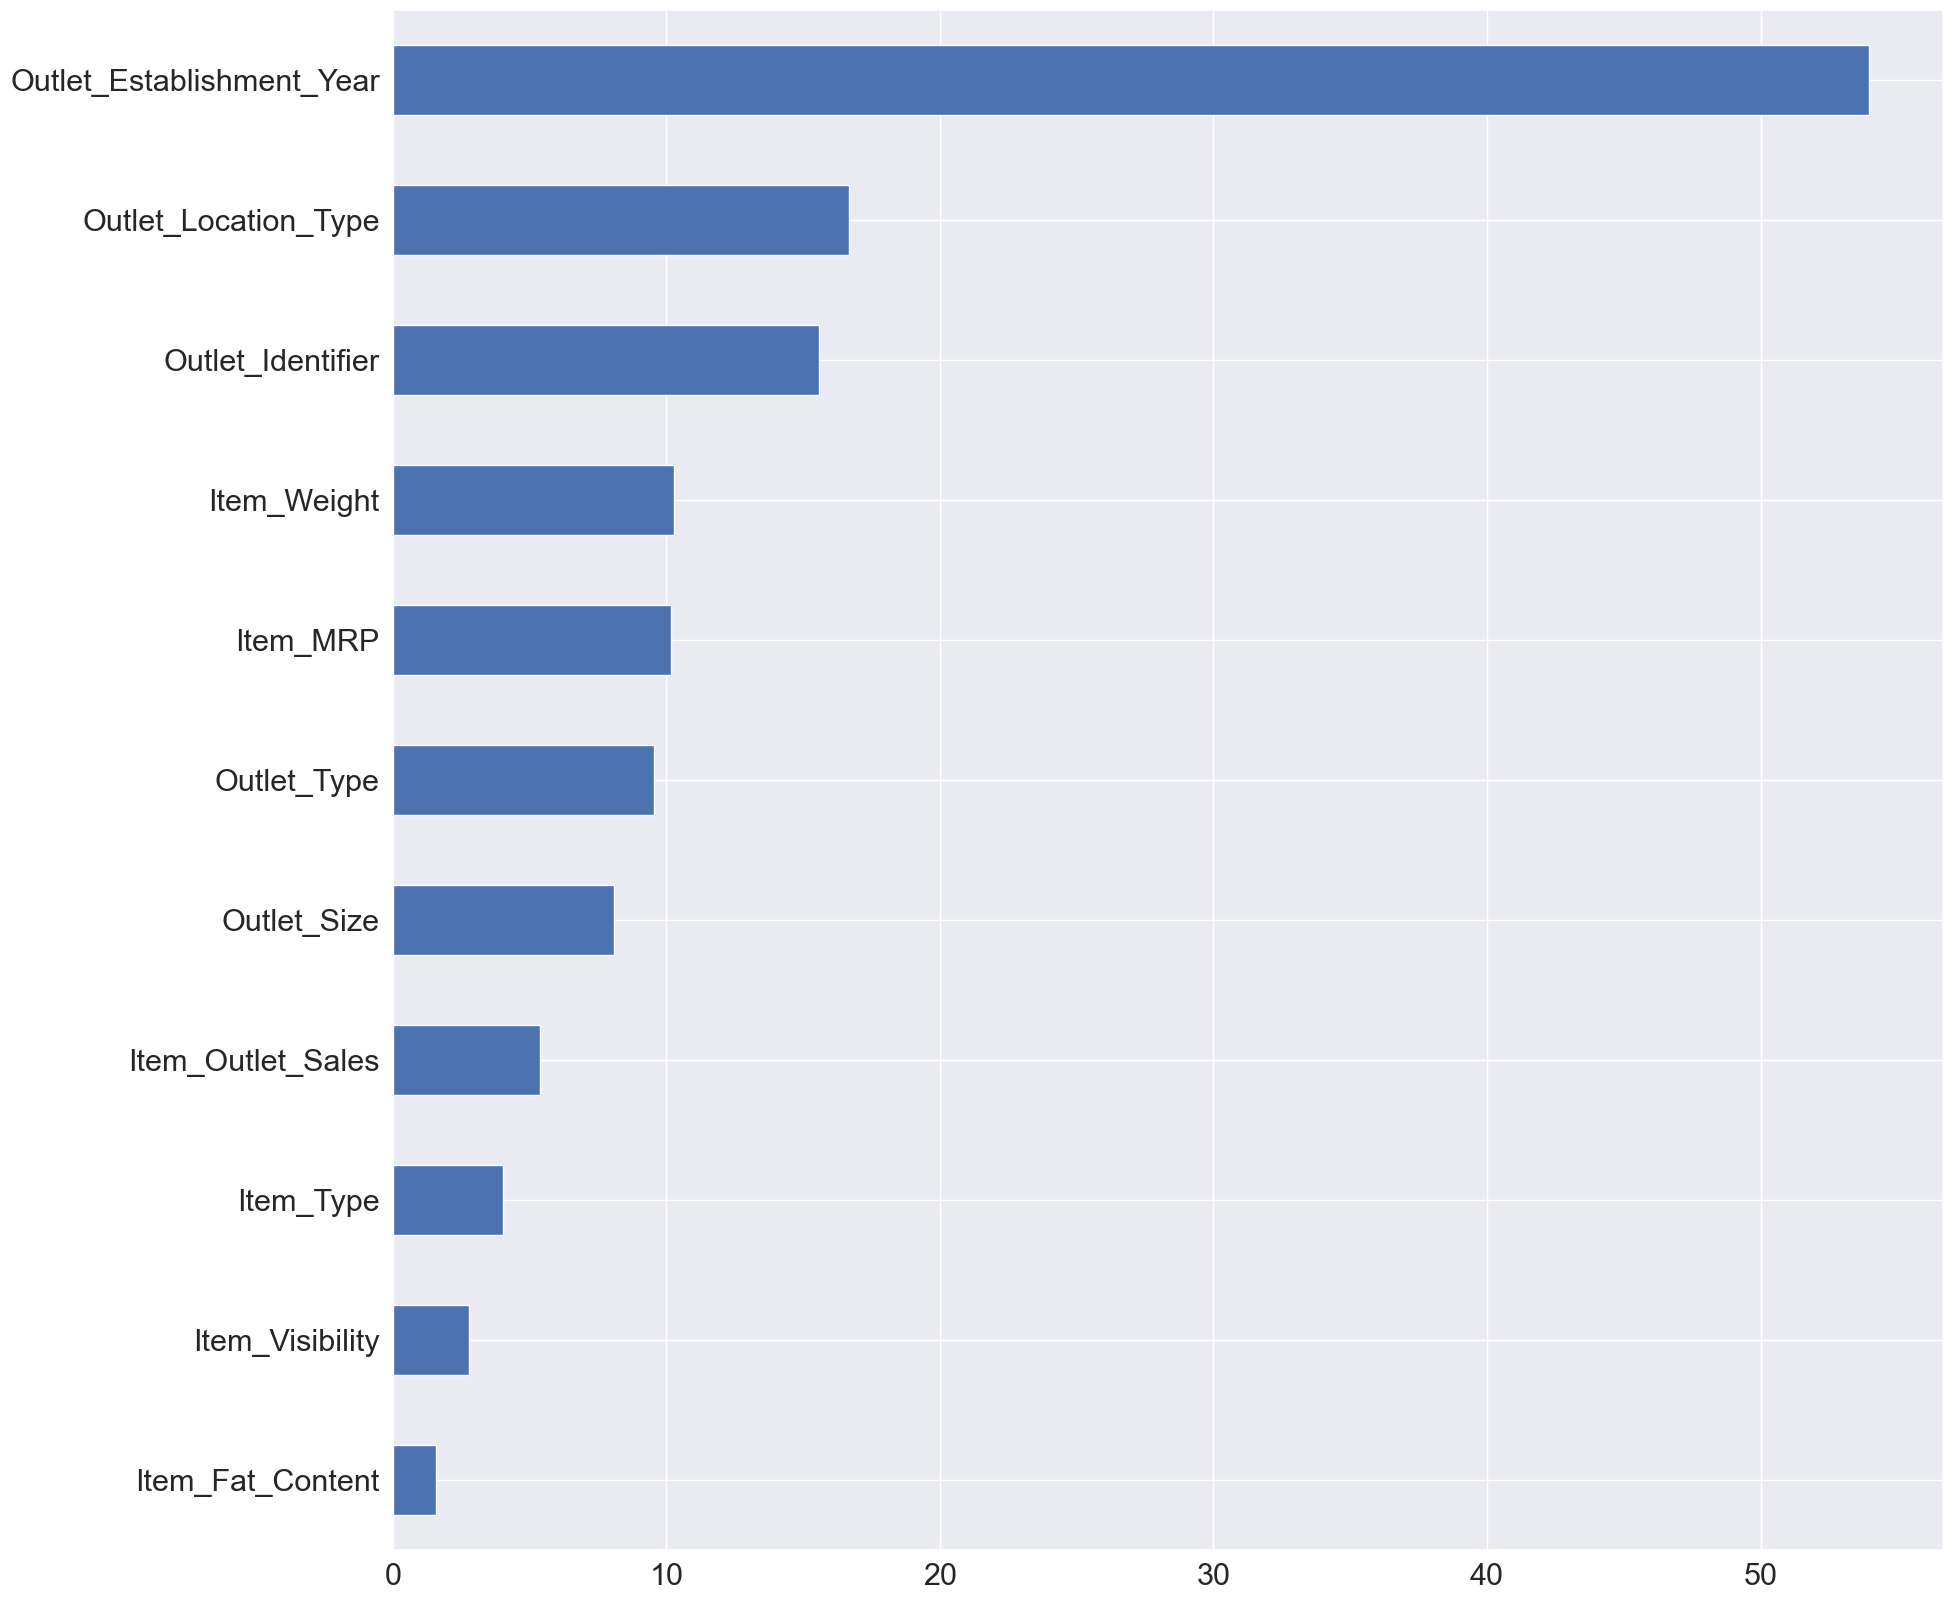

In [65]:
vif_list=[]
for i in range(df.shape[1]):
    vif=variance_inflation_factor(df.to_numpy(),i)
    vif_list.append(vif)
s1=pd.Series(vif_list,index=df.columns)
plt.figure(figsize=(20,20))
sns.set(font_scale=2)
s1.sort_values().plot(kind='barh')

# Model Building

In [66]:
x=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

In [67]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,9,1999,1.0,0.0,1
1,5.920,1,0.019278,14,48.2692,3,2009,1.0,2.0,2
2,17.500,0,0.016760,10,141.6180,9,1999,1.0,0.0,1
3,19.200,1,0.000000,6,182.0950,0,1998,1.0,2.0,0
4,8.930,0,0.000000,9,53.8614,1,1987,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,1987,0.0,2.0,1
8519,8.380,1,0.046982,0,108.1570,7,2002,1.0,1.0,1
8520,10.600,0,0.035186,8,85.1224,6,2004,2.0,1.0,1
8521,7.210,1,0.145221,13,103.1332,3,2009,1.0,2.0,2


In [68]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [69]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)

In [70]:
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5470,16.000000,1,0.065329,4,78.4986,3,2009,1.0,2.0,2
8431,19.700000,0,0.053331,6,56.7930,7,2002,1.0,1.0,1
3557,7.655000,0,0.032010,3,117.2492,7,2002,1.0,1.0,1
7918,15.200000,0,0.033651,9,108.9912,9,1999,1.0,0.0,1
4573,12.300000,1,0.058106,13,60.4562,6,2004,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
4829,12.857645,0,0.035863,10,58.3562,5,1985,1.0,2.0,3
7291,7.520000,1,0.044023,0,183.0950,8,1997,2.0,0.0,1
1344,12.850000,0,0.033173,13,172.0422,6,2004,2.0,1.0,1
7293,13.800000,1,0.024660,3,87.4172,0,1998,1.0,2.0,0


In [71]:
x_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7186,12.857645,0,0.097430,14,172.8738,5,1985,1.0,2.0,3
2283,7.895000,1,0.094567,2,104.5332,8,1997,2.0,0.0,1
2206,12.650000,1,0.076199,5,191.3846,7,2002,1.0,1.0,1
5446,17.600000,1,0.039382,13,98.0410,3,2009,1.0,2.0,2
6380,20.600000,1,0.048033,6,188.2556,7,2002,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
2879,12.857645,1,0.069909,14,163.2868,4,1985,2.0,0.0,0
6094,5.485000,0,0.071558,8,165.7842,0,1998,1.0,2.0,0
1598,15.700000,1,0.018969,6,61.9536,7,2002,1.0,1.0,1
8012,13.650000,0,0.035954,13,185.2924,6,2004,2.0,1.0,1


In [72]:
y_train

5470    1791.6678
8431     848.8950
3557    2432.8332
7918    1965.4416
4573    1777.6860
          ...    
4829    1125.8678
7291    5492.8500
1344    5345.7082
7293     178.4344
1289    1065.2800
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [73]:
y_test

7186    3649.2498
2283    1845.5976
2206    2675.1844
5446     675.7870
6380    3755.1120
          ...    
2879     491.3604
6094     165.7842
1598    1225.0720
8012    3146.5708
7756    2563.3300
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

### create instance of the model

In [74]:
model=LinearRegression()

In [75]:
model.fit(x_train,y_train)

LinearRegression()

In [76]:
model.coef_

array([ 3.94948844e-01,  5.19195987e+01, -1.40944256e+03, -1.71851477e+00,
        1.55086022e+01,  6.03566969e+01,  1.37772869e+00, -3.25307307e+02,
       -2.08733951e+02,  8.86935237e+02])

In [77]:
model.intercept_

-3411.556194535542

# 7. Model Evaluation

In [78]:
y_pred = model.predict(x_test)

In [79]:
y_pred

array([4067.77725713, 1598.41969303, 3031.08040896, ..., 1103.9350906 ,
       2545.14046226, 3041.31097512])

#### 1. Residual

In [80]:
residual = y_test - y_pred
residual

7186    -418.527457
2283     247.177907
2206    -355.896009
5446   -1394.181823
6380     731.439293
           ...     
2879    -889.442572
6094    -891.229137
1598     121.136909
8012     601.430338
7756    -477.980975
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [81]:
# Model Evaluation for Testing Data

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred)
print("R Squared Value :",r_squared_value)

r2 = model.score(x_test, y_test)
print("Direct R Squared Value :",r2)

adj_r2  = 1 - (((1 - r_squared_value) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

Mean Sqaured Error : 1410895.3746428408
Root Mean Sqaured Error : 1187.8111696068702
Mean Absolute Error : 888.7267769825253
R Squared Value : 0.5246968849367786
Direct R Squared Value : 0.5246968849367786
Adjusted R Squared Value : 0.5218910814240088


In [82]:
# Model Evaluation for Training Data

y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred_train)
print("R Squared Value :",r_squared_value)

# Direct calculation
r2 = model.score(x_train, y_train)
print("Direct R Squared Value :",r2)

adj_r2  = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

Mean Sqaured Error : 1429743.9217060844
Root Mean Sqaured Error : 1195.7189978026126
Mean Absolute Error : 899.0637813733288
R Squared Value : 0.5065529907005073
Direct R Squared Value : 0.5065529907005073
Adjusted R Squared Value : 0.5058280795659407


# Normality of Residual

In [83]:
Residual = y_train - y_pred_train
Residual

5470      46.510797
8431     -76.235456
3557     539.662478
7918    -115.328268
4573    1148.415856
           ...     
4829   -1259.550044
7291    2601.518861
1344    3002.456184
7293     206.888091
1289    -988.909537
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

### 1. kdeplot

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

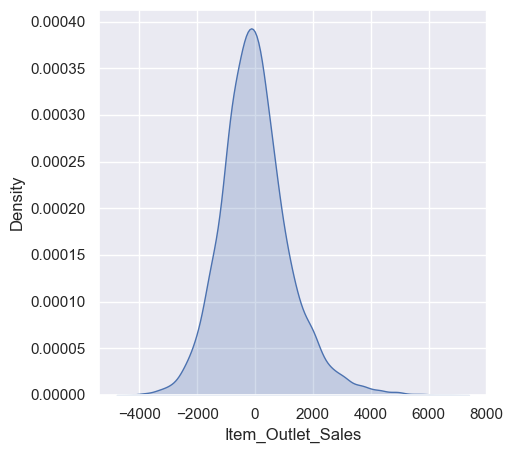

In [84]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1)
sns.kdeplot(Residual, fill=True)

In [85]:
# Mean
mean = Residual.mean()
print("Mean -->",mean)

median = Residual.median()
print("median -->",median)

mode = Residual.mode()[0]
print("Mode -->",mode)

Mean --> 1.1030691369607018e-12
median --> -84.54710755506477
Mode --> -4165.242894185546


### Hypothesis Testing

#### Shapiro Test

In [86]:
_ , p_val = shapiro(Residual)
print("P_Value:",p_val)

P_Value: 3.609077693659452e-33


####  KS test

In [87]:
_ , p_val = kstest(Residual, 'norm')
print("P_Value:",p_val)

P_Value: 0.0


#### Normal test

In [88]:
_ , p_val = normaltest(Residual)
print("P_Value:",p_val)

P_Value: 2.0242100468347436e-147


## QQ Plot

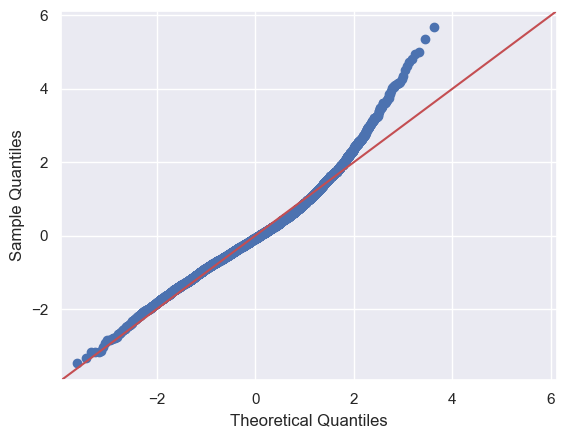

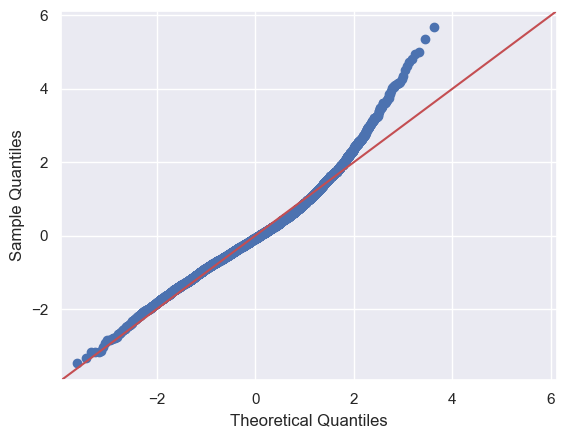

In [89]:
sm.qqplot(Residual, line = '45', fit=True)

## 4. Homoscedasticity

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Outlet_Sales'>

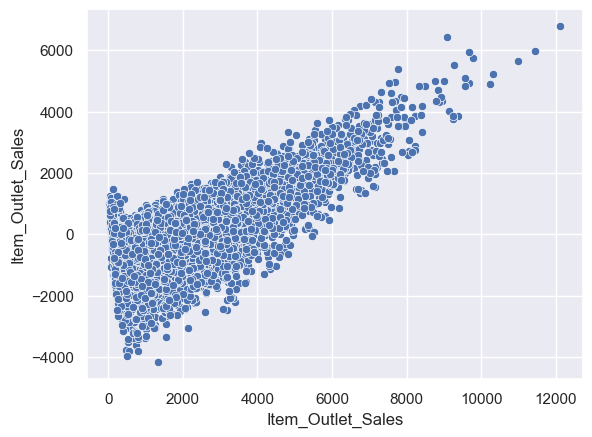

In [90]:
sns.scatterplot(x = y_train, y= Residual)

<AxesSubplot:>

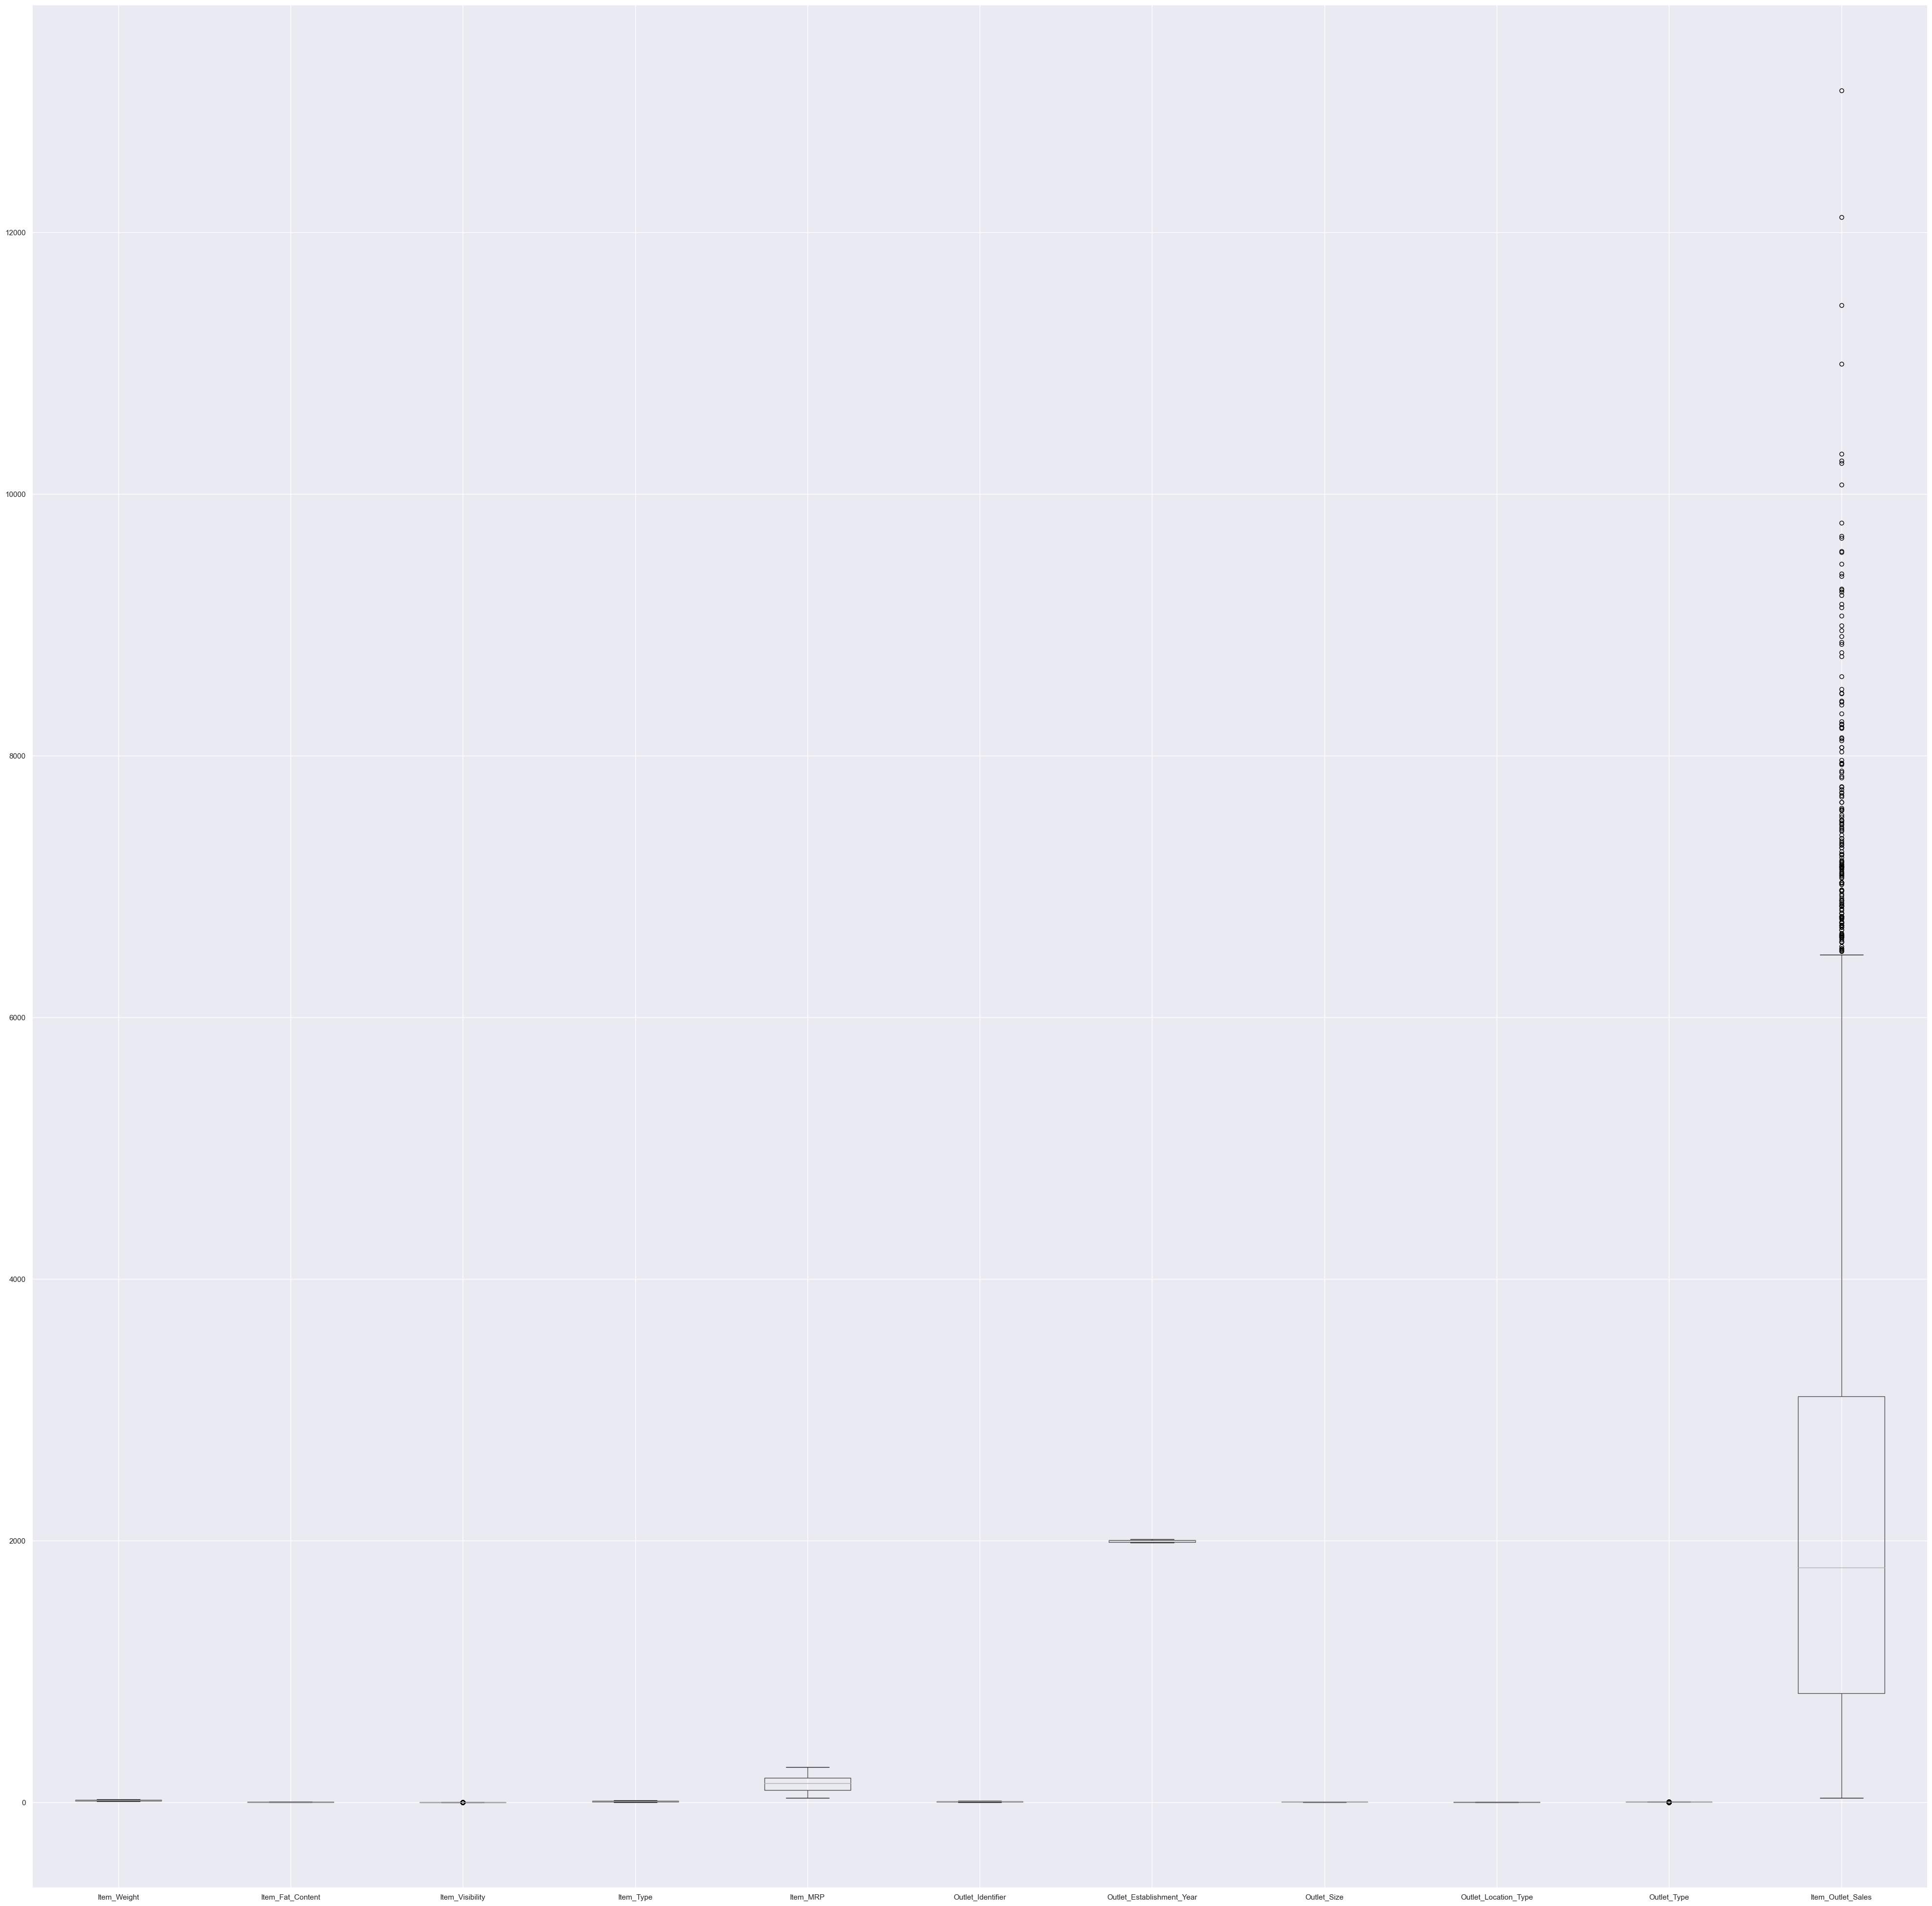

In [91]:
plt.figure(figsize=(50,50))
df.boxplot()

# Outliers

# 1.IQR

In [92]:
q1 = df['Item_Weight'].quantile(0.25)
q2 = df['Item_Weight'].quantile(0.50)
q3 = df['Item_Weight'].quantile(0.75)
median = df['Item_Weight'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 9.31
Q2 : 12.857645184136183
Q3 : 16.0
Median : 12.857645184136183
upper_tail : 26.035
lower_tail : -0.7249999999999996


<AxesSubplot:xlabel='Item_Weight'>

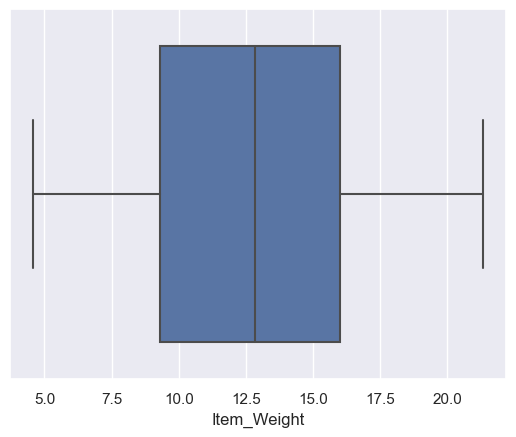

In [93]:
sns.boxplot(x = df['Item_Weight'])

In [94]:
q1 = df['Item_Fat_Content'].quantile(0.25)
q2 = df['Item_Fat_Content'].quantile(0.50)
q3 = df['Item_Fat_Content'].quantile(0.75)
median = df['Item_Fat_Content'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 0.0
Q2 : 0.0
Q3 : 1.0
Median : 0.0
upper_tail : 2.5
lower_tail : -1.5


<AxesSubplot:xlabel='Item_Fat_Content'>

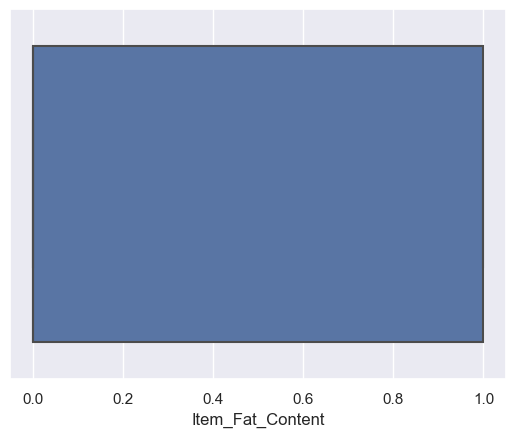

In [95]:
sns.boxplot(x = df['Item_Fat_Content'])

In [96]:
q1 = df['Item_Visibility'].quantile(0.25)
q2 = df['Item_Visibility'].quantile(0.50)
q3 = df['Item_Visibility'].quantile(0.75)
median = df['Item_Visibility'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 0.0269894775
Q2 : 0.053930934
Q3 : 0.0945852925
Median : 0.053930934
upper_tail : 0.195979015
lower_tail : -0.07440424500000001


<AxesSubplot:xlabel='Item_Visibility'>

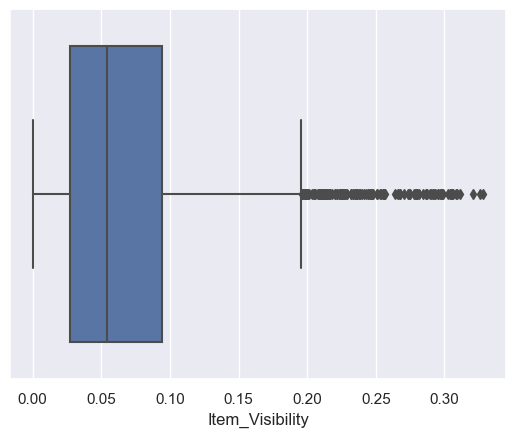

In [97]:
sns.boxplot(x = df['Item_Visibility'])

In [98]:
df.loc[df['Item_Visibility'] > upper_tail, 'Item_Visibility'] = upper_tail

<AxesSubplot:xlabel='Item_Visibility'>

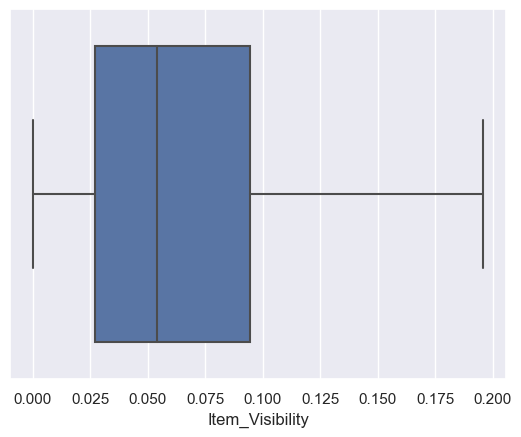

In [99]:
sns.boxplot(x = df['Item_Visibility'])

In [100]:
q1 = df['Item_MRP'].quantile(0.25)
q2 = df['Item_MRP'].quantile(0.50)
q3 = df['Item_MRP'].quantile(0.75)
median = df['Item_MRP'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 93.8265
Q2 : 143.0128
Q3 : 185.6437
Median : 143.0128
upper_tail : 323.3695
lower_tail : -43.8993


<AxesSubplot:xlabel='Item_MRP'>

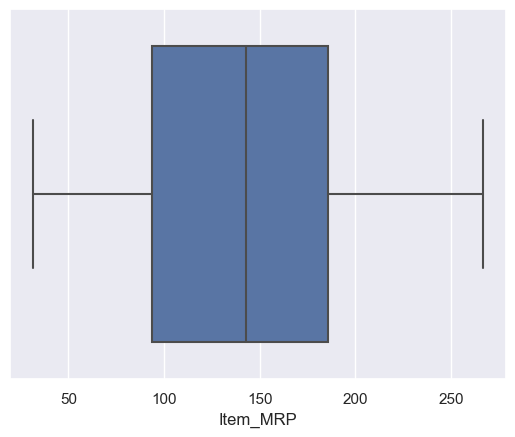

In [101]:
sns.boxplot(x = df['Item_MRP'])

In [102]:
q1 = df['Outlet_Establishment_Year'].quantile(0.25)
q2 = df['Outlet_Establishment_Year'].quantile(0.50)
q3 = df['Outlet_Establishment_Year'].quantile(0.75)
median = df['Outlet_Establishment_Year'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 1987.0
Q2 : 1999.0
Q3 : 2004.0
Median : 1999.0
upper_tail : 2029.5
lower_tail : 1961.5


<AxesSubplot:xlabel='Outlet_Establishment_Year'>

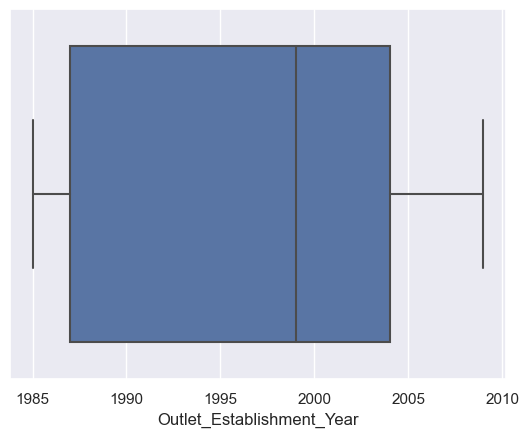

In [103]:
sns.boxplot(x = df['Outlet_Establishment_Year'])

In [104]:
q1 = df['Outlet_Size'].quantile(0.25)
q2 = df['Outlet_Size'].quantile(0.50)
q3 = df['Outlet_Size'].quantile(0.75)
median = df['Outlet_Size'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 1.0
Q2 : 1.0
Q3 : 2.0
Median : 1.0
upper_tail : 3.5
lower_tail : -0.5


<AxesSubplot:xlabel='Outlet_Size'>

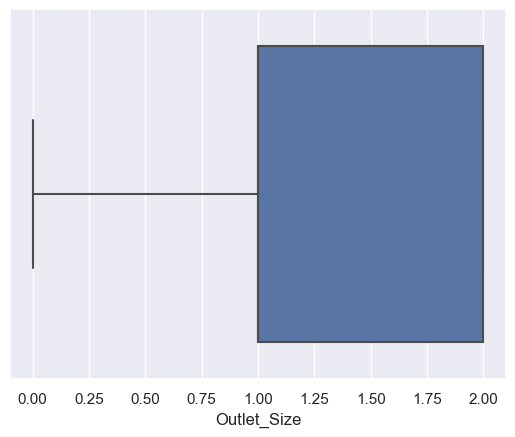

In [105]:
sns.boxplot(x = df['Outlet_Size'])

In [106]:
q1 = df['Outlet_Location_Type'].quantile(0.25)
q2 = df['Outlet_Location_Type'].quantile(0.50)
q3 = df['Outlet_Location_Type'].quantile(0.75)
median = df['Outlet_Location_Type'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 0.0
Q2 : 1.0
Q3 : 2.0
Median : 1.0
upper_tail : 5.0
lower_tail : -3.0


<AxesSubplot:xlabel='Outlet_Location_Type'>

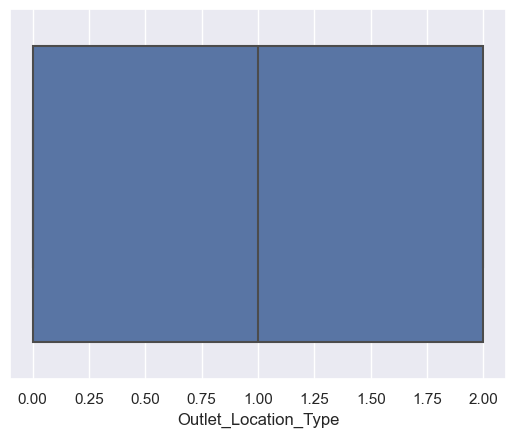

In [107]:
sns.boxplot(x = df['Outlet_Location_Type'])

In [108]:
q1 = df['Outlet_Type'].quantile(0.25)
q2 = df['Outlet_Type'].quantile(0.50)
q3 = df['Outlet_Type'].quantile(0.75)
median = df['Outlet_Type'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 1.0
Q2 : 1.0
Q3 : 1.0
Median : 1.0
upper_tail : 1.0
lower_tail : 1.0


In [109]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,9,1999,1.0,0.0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,3,2009,1.0,2.0,2,443.4228
2,17.500,0,0.016760,10,141.6180,9,1999,1.0,0.0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,0,1998,1.0,2.0,0,732.3800
4,8.930,0,0.000000,9,53.8614,1,1987,0.0,2.0,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,1987,0.0,2.0,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,7,2002,1.0,1.0,1,549.2850
8520,10.600,0,0.035186,8,85.1224,6,2004,2.0,1.0,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,3,2009,1.0,2.0,2,1845.5976


In [110]:
df[['Outlet_Type']].loc[df['Outlet_Type'] > upper_tail]

,Outlet_Type
1,2
5,2
7,3
16,2
18,3
...,...
8506,2
8511,2
8515,2
8516,2


<AxesSubplot:>

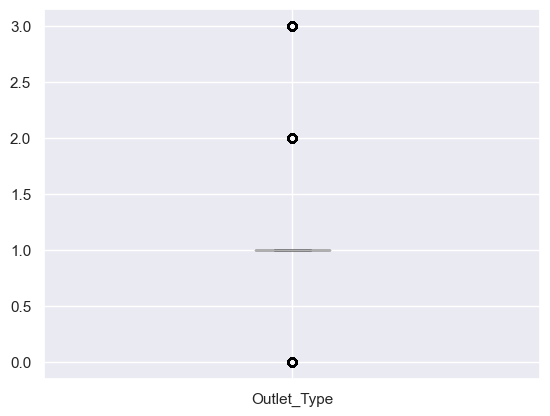

In [111]:
df[['Outlet_Type']].boxplot()

<AxesSubplot:xlabel='Outlet_Type'>

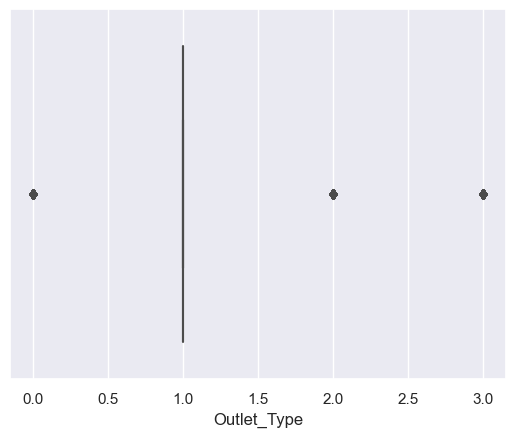

In [112]:
sns.boxplot(x = df['Outlet_Type'])

In [113]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,9,1999,1.0,0.0,1
1,5.920,1,0.019278,14,48.2692,3,2009,1.0,2.0,2
2,17.500,0,0.016760,10,141.6180,9,1999,1.0,0.0,1
3,19.200,1,0.000000,6,182.0950,0,1998,1.0,2.0,0
4,8.930,0,0.000000,9,53.8614,1,1987,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,1987,0.0,2.0,1
8519,8.380,1,0.046982,0,108.1570,7,2002,1.0,1.0,1
8520,10.600,0,0.035186,8,85.1224,6,2004,2.0,1.0,1
8521,7.210,1,0.145221,13,103.1332,3,2009,1.0,2.0,2


## 2. Ridge Regression

In [114]:
ridge_reg_model = Ridge(alpha= 1.0)  
ridge_reg_model.fit(x_train, y_train)

Ridge()

In [115]:
# Training Dataset

y_pred_train = ridge_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 1429759.016455146
RMSE : 1195.7253097827886
MAE : 899.0759030788422
R2 Scored : 0.5065477810551524
Adjusted R Squared Value : 0.5058228622672211


In [116]:
# Testing Dataset

y_pred = ridge_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 1410878.4745457445
RMSE : 1187.8040556193369
MAE : 888.6620593932255
R2 Scored : 0.5247025782496486
Adjusted R Squared Value : 0.5218968083455733


<AxesSubplot:>

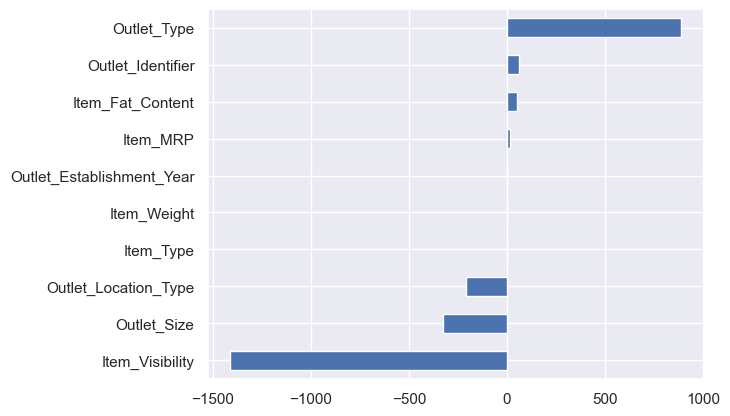

In [117]:
model.coef_

s2 = pd.Series(model.coef_, index=x.columns)
s2.sort_values().plot(kind = "barh")

## 3. Lasso Regression

In [118]:
lasso_reg_model = Lasso(alpha= 1.0)  
lasso_reg_model.fit(x_train, y_train)

Lasso()

In [119]:
# Training Dataset

y_pred_train = lasso_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 1430157.3359566715
RMSE : 1195.8918579690521
MAE : 899.2797168001431
R2 Scored : 0.5064103091877854
Adjusted R Squared Value : 0.5056851884432397


In [120]:
# Testing Dataset

y_pred = lasso_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 1411356.0008229127
RMSE : 1188.0050508406573
MAE : 888.5907237047498
R2 Scored : 0.5245417089668218
Adjusted R Squared Value : 0.5217349894211714


## Hyperparameter Tunning

### Ridge Regression

### 1. GridSearchCv

In [121]:
# Model instance
ridge_model = Ridge()

# Defined param_grid
param_grid = {"alpha": np.arange(0.01,3,0.01)}


gscv_ridge_model = GridSearchCV(ridge_model, param_grid, n_jobs=-1)

gscv_ridge_model.fit(x_train, y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [122]:
gscv_ridge_model.best_estimator_

Ridge(alpha=0.21000000000000002)

In [123]:
ridge_reg_model = Ridge(alpha= 0.27)  
ridge_reg_model.fit(x_train, y_train)

Ridge(alpha=0.27)

In [124]:
# Training Dataset

y_pred_train = ridge_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 1429745.116191856
RMSE : 1195.7194972868244
MAE : 899.0664195853898
R2 Scored : 0.5065525784480593
Adjusted R Squared Value : 0.5058276667078625


In [125]:
# Testing Dataset

y_pred = ridge_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 1410887.5075350266
RMSE : 1187.807858003569
MAE : 888.7086293837427
R2 Scored : 0.5246995352118577
Adjusted R Squared Value : 0.5218937473441592


### 2. RandomizedSearchCV

In [126]:
# Model instance
ridge_model = Ridge()

# Defined param_grid
param_grid = {"alpha": np.arange(0.01,3,0.01)}

rscv_ridge_model = RandomizedSearchCV(ridge_model, param_grid, n_jobs=-1)

rscv_ridge_model.fit(x_train, y_train)

rscv_ridge_model.best_estimator_

Ridge(alpha=0.5800000000000001)

In [127]:
ridge_reg_model = Ridge(alpha= 0.1800) 
ridge_reg_model.fit(x_train, y_train)

Ridge(alpha=0.18)

In [128]:
# Training Dataset

y_pred_train = ridge_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 1429744.4581155607
RMSE : 1195.7192221067455
MAE : 899.0654994832395
R2 Scored : 0.5065528055696963
Adjusted R Squared Value : 0.5058278941631584


In [129]:
# Testing Dataset

y_pred = ridge_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 1410889.8334346681
RMSE : 1187.808837075507
MAE : 888.7146205538835
R2 Scored : 0.5246987516616635
Adjusted R Squared Value : 0.521892959168521


# LASSO Regression

### 1. GridSearchCv

In [130]:
# Model instance
ridge_model = Lasso()

# Defined param_lasso
param_lasso = {"alpha": np.arange(0.01,3,0.01)}


gscv_lasso_model = GridSearchCV(ridge_model, param_grid, n_jobs=-1)

gscv_lasso_model.fit(x_train, y_train)

GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [131]:
gscv_lasso_model.best_estimator_

Lasso(alpha=0.01)

In [132]:
lasso_reg_model = Lasso(alpha= 0.01)  
lasso_reg_model.fit(x_train, y_train)

Lasso(alpha=0.01)

In [133]:
# Training Dataset

y_pred_train = lasso_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 1429743.9630555818
RMSE : 1195.7190150932543
MAE : 899.0638022170039
R2 Scored : 0.50655297642957
Adjusted R Squared Value : 0.5058280652740383


In [134]:
# Testing Dataset

y_pred = ridge_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 1410889.8334346681
RMSE : 1187.808837075507
MAE : 888.7146205538835
R2 Scored : 0.5246987516616635
Adjusted R Squared Value : 0.521892959168521


### 2. RandomizedSearchCV

In [135]:
# Model instance
ridge_model = Lasso()

# Defined param_grid
param_lasso = {"alpha": np.arange(0.01,3,0.01)}

rscv_lasso_model = RandomizedSearchCV(ridge_model, param_grid, n_jobs=-1)

rscv_lasso_model.fit(x_train, y_train)

rscv_lasso_model.best_estimator_

Lasso(alpha=0.16)

In [136]:
lasso_reg_model = Lasso(alpha= 0.51) 
lasso_reg_model.fit(x_train, y_train)

Lasso(alpha=0.51)

In [137]:
# Training Dataset

y_pred_train = lasso_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 1429851.4723436104
RMSE : 1195.763970164518
MAE : 899.1103578647742
R2 Scored : 0.5065158717873721
Adjusted R Squared Value : 0.5057909061223029


In [138]:
# Testing Dataset

y_pred = lasso_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R2 Scored :", r2)

adj_r2  = 1 - (((1 - r2) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

MSE : 1411026.6707573845
RMSE : 1187.866436413364
MAE : 888.5957014058388
R2 Scored : 0.5246526538383145
Adjusted R Squared Value : 0.5218465892210673


In [139]:
x.head(1).T

,0
Item_Weight,9.300000
Item_Fat_Content,0.000000
Item_Visibility,0.016047
Item_Type,4.000000
Item_MRP,249.809200
Outlet_Identifier,9.000000
Outlet_Establishment_Year,1999.000000
Outlet_Size,1.000000
Outlet_Location_Type,0.000000
Outlet_Type,1.000000


In [142]:
column_names=x.columns
list(column_names)
len(column_names)

10

In [143]:
with open("Linear_Model_sales_data.pkl","wb") as f:
    pickle.dump(model,f)

In [145]:
json_data={"Item_Fat_Content":{"Low Fat":0,"Regular":1},
           "Item_Type":{ 'Baking Goods': 0,
                         'Breads': 1,
                         'Breakfast': 2,
                         'Canned': 3,
                         'Dairy': 4,
                         'Frozen Foods': 5,
                         'Fruits and Vegetables':6,
                         'Hard Drinks': 7,
                         'Health and Hygiene': 8,
                         'Household': 9,
                         'Meat': 10,
                         'Others': 11,
                         'Seafood': 12,
                         'Snack Foods': 13,
                         'Soft Drinks': 14,
                         'Starchy Foods': 15},
           "Outlet_Identifier":{"OUT010": 0,
                                "OUT013" :1,
                                "OUT017" :2,
                                "OUT018" :3,
                                "OUT019" :4,
                                "OUT027" :5,
                                "OUT035" :6,
                                "OUT045" :7,
                                "OUT046" :8,
                                "OUT049" :9},
           "Outlet_Size":{"Medium" :1.0,
                          "Small"  :2.0,
                          "High"   :0.0},
           "Outlet_Location_Type":{"Tier 3" :1.0,
                                   "Tier 2" :2.0,
                                   "Tier 1" :0.0},
           "Outlet_Type":{"Supermarket Type1":1,
                          "Grocery Store ":0,
                          "Supermarket Type3":3,
                          "Supermarket Type2":2},
           "columns":list(column_names)
           
} 
json_data

{'Item_Fat_Content': {'Low Fat': 0, 'Regular': 1},
 'Item_Type': {'Baking Goods': 0,
  'Breads': 1,
  'Breakfast': 2,
  'Canned': 3,
  'Dairy': 4,
  'Frozen Foods': 5,
  'Fruits and Vegetables': 6,
  'Hard Drinks': 7,
  'Health and Hygiene': 8,
  'Household': 9,
  'Meat': 10,
  'Others': 11,
  'Seafood': 12,
  'Snack Foods': 13,
  'Soft Drinks': 14,
  'Starchy Foods': 15},
 'Outlet_Identifier': {'OUT010': 0,
  'OUT013': 1,
  'OUT017': 2,
  'OUT018': 3,
  'OUT019': 4,
  'OUT027': 5,
  'OUT035': 6,
  'OUT045': 7,
  'OUT046': 8,
  'OUT049': 9},
 'Outlet_Size': {'Medium': 1.0, 'Small': 2.0, 'High': 0.0},
 'Outlet_Location_Type': {'Tier 3': 1.0, 'Tier 2': 2.0, 'Tier 1': 0.0},
 'Outlet_Type': {'Supermarket Type1': 1,
  'Grocery Store ': 0,
  'Supermarket Type3': 3,
  'Supermarket Type2': 2},
 'columns': ['Item_Weight',
  'Item_Fat_Content',
  'Item_Visibility',
  'Item_Type',
  'Item_MRP',
  'Outlet_Identifier',
  'Outlet_Establishment_Year',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Out

In [146]:
with open("project_sales_data.json","w") as f:
    json.dump(json_data,f)

# single user input testing

In [147]:
Item_Weight=9.3
Item_Fat_Content="Low Fat"
Item_Visibility=0.016760
Item_Type="Canned"
Item_MRP=249.809
Outlet_Identifier="OUT019"
Outlet_Establishment_Year=2019
Outlet_Size="Medium"
Outlet_Location_Type="Tier 3"
Outlet_Type="Supermarket Type1"

In [149]:
test_array=np.zeros(len(column_names))

test_array[0]=Item_Weight
test_array[1]=json_data["Item_Fat_Content"][Item_Fat_Content]
test_array[2]=Item_Visibility
test_array[3]=json_data["Item_Type"][Item_Type]
test_array[4]=Item_MRP
test_array[5]=json_data["Outlet_Identifier"][Outlet_Identifier]
test_array[6]=Outlet_Establishment_Year
test_array[7]=json_data["Outlet_Size"][Outlet_Size]
test_array[8]=json_data["Outlet_Location_Type"][Outlet_Location_Type]
test_array[9]=json_data["Outlet_Type"][Outlet_Type]

test_array

array([9.30000e+00, 0.00000e+00, 1.67600e-02, 3.00000e+00, 2.49809e+02,
       4.00000e+00, 2.01900e+03, 1.00000e+00, 1.00000e+00, 1.00000e+00])

In [151]:
charges=round(model.predict([test_array])[0],2)
print(f"predicted Item Outlet Sales:{charges} ")

predicted Item Outlet Sales:3813.48 
